In [3]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\braintumor.h5
.\brain_tumer.ipynb
.\archive\Testing\glioma_tumor\image(1).jpg
.\archive\Testing\glioma_tumor\image(10).jpg
.\archive\Testing\glioma_tumor\image(100).jpg
.\archive\Testing\glioma_tumor\image(11).jpg
.\archive\Testing\glioma_tumor\image(12).jpg
.\archive\Testing\glioma_tumor\image(13).jpg
.\archive\Testing\glioma_tumor\image(14).jpg
.\archive\Testing\glioma_tumor\image(15).jpg
.\archive\Testing\glioma_tumor\image(16).jpg
.\archive\Testing\glioma_tumor\image(17).jpg
.\archive\Testing\glioma_tumor\image(18).jpg
.\archive\Testing\glioma_tumor\image(19).jpg
.\archive\Testing\glioma_tumor\image(2).jpg
.\archive\Testing\glioma_tumor\image(20).jpg
.\archive\Testing\glioma_tumor\image(21).jpg
.\archive\Testing\glioma_tumor\image(22).jpg
.\archive\Testing\glioma_tumor\image(23).jpg
.\archive\Testing\glioma_tumor\image(24).jpg
.\archive\Testing\glioma_tumor\image(25).jpg
.\archive\Testing\glioma_tumor\image(26).jpg
.\archive\Testing\glioma_tumor\image(27).jpg
.\archive\Testing\gl

C:\Users\GAURANG BRDV\AppData\Local\Temp\ipykernel_9048\3709483204.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# for i in lables:
#     folderPath = os.path.join('./archive/Testing',i)

#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         if img is not None:
#             img = cv2.resize(img,(image_size,image_size))
#             X_train.append(img)
#             Y_train.append(i)
#         else:
#             print("failed to lead imagePath: {folderPath}")


# for i in lables:
#     folderPath = os.path.join('./archive/Testing',i)

#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         if img is not None:
#             img = cv2.resize(img,(image_size,image_size))
#             X_train.append(img)
#             Y_train.append(i)
#         else:
#             print("failed to lead imagePath: {folderPath}")


# X_train = []
# Y_train = []
# image_size = 150
# labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# for label in labels:
#     folderPath = os.path.join('./archive/Training',label)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size,image_size))
#         X_train.append(img)
#         Y_train.append(label)
        
# for label in labels:
#     folderPath = os.path.join('./archive/Testing',label)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size,image_size))
#         X_train.append(img)
#         Y_train.append(label)

# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

for label in labels:
    folderPath = os.path.join('./archive/Training',label)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_train.append(img)
        Y_train.append(label)
        
for label in labels:
    folderPath = os.path.join('./archive/Testing',label)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
#related to data preprossesing.
#for training perpouse the training data will be shuffled and trained.
#for producibility of algorithem we use random_state.
#fix the value of it and algo will generate same sequence of random numbers.
# for random input random_state is used by which the algo's result are reproducible across diffrent runs by stenning a fixed seed value for random number generator
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
print(X_train.shape)
print(Y_train.shape)
X_train.shape
Y_train.shape
# print("the length of X_train is :",len(X_train))


(3264, 150, 150, 3)
(3264,)


(3264,)

In [8]:
''' Train_test_split is function provided by sklearn that split the dataset into 
    two subset.
    It randomly devide the dataset in two subset.
    The test_size indicates that how many numbers of pictures from data will be used for training and testing.
    suppose test_size = 0.1 then it will show that 10%data will be used for testing and remaining 90%data will used for testing.
'''
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nSample values in X_train:")
print(X_train[:5])  # Print the first 5 samples in X_train
print("\nSample values in y_train:")
print(y_train[:5])  # Print the first 5 samples in y_train
print("\nSample values in X_test:")
print(X_test[:5])  # Print the first 5 samples in X_test
print("\nSample values in y_test:")
print(y_test[:5])  # Print the first 5 samples in y_test
unique_elements = np.unique(y_train)

# Print the unique elements
print("Unique elements:", unique_elements)

unique_elementss = np.unique(y_test)

# Print the unique elements
#print("Unique elementss:", unique_elementss)


X_train shape: (2937, 150, 150, 3)
X_test shape: (327, 150, 150, 3)
y_train shape: (2937,)
y_test shape: (327,)

Sample values in X_train:
[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 3  3  3]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 2  2  2]
   [ 2  2  2]
   [ 1  1  1]
   ...
   [ 3  3  3]
   [ 3  3  3]
   [ 3  3  3]]

  ...

  [[ 3  3  3]
   [ 3  3  3]
   [ 2  2  2]
   ...
   [ 5  5  5]
   [ 3  3  3]
   [ 3  3  3]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 3  3  3]
   [ 3  3  3]
   [ 3  3  3]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

unique_elements = np.unique(y_train)

# Print the unique elements
print("Unique elements:", unique_elements)

Unique elements: [0. 1.]


In [10]:
CNN_model = Sequential()
CNN_model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
CNN_model.add(Conv2D(64,(3,3),activation='relu'))
CNN_model.add(MaxPooling2D(2,2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Conv2D(64,(3,3),activation='relu'))
CNN_model.add(Conv2D(64,(3,3),activation='relu'))
CNN_model.add(Dropout(0.3))
CNN_model.add(MaxPooling2D(2,2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Conv2D(128,(3,3),activation='relu'))
CNN_model.add(Conv2D(128,(3,3),activation='relu'))
CNN_model.add(Conv2D(128,(3,3),activation='relu'))
CNN_model.add(MaxPooling2D(2,2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Conv2D(128,(3,3),activation='relu'))
CNN_model.add(Conv2D(256,(3,3),activation='relu'))
CNN_model.add(MaxPooling2D(2,2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Flatten())
CNN_model.add(Dense(512,activation = 'relu'))
CNN_model.add(Dense(512,activation = 'relu'))
CNN_model.add(Dropout(0.3))
CNN_model.add(Dense(4,activation='softmax'))

In [11]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [12]:
#for two category we will use binery_cressentropy , but for more than two we use categorical_crossentropy.
#Adam is good optimizer.
#specially we are focusing on accuracy so we have mension that in matrics, we can also focus on loss.
CNN_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
CNN_model.summary()
compile_config = CNN_model.get_config()
print(compile_config) # cheking for configration.




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                       

In [15]:
print("Is model compiled?", CNN_model._is_compiled) # cheking whether the mode is compiled or not.


Is model compiled? True


In [14]:
#history will store all the training value.
#validation_split we are using for diffrent splits every time.
history = CNN_model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20




KeyboardInterrupt: 

In [ ]:
train_loss, train_accuracy = CNN_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)

# Evaluate testing accuracy
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy:", test_accuracy)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\GAURANG BRDV\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


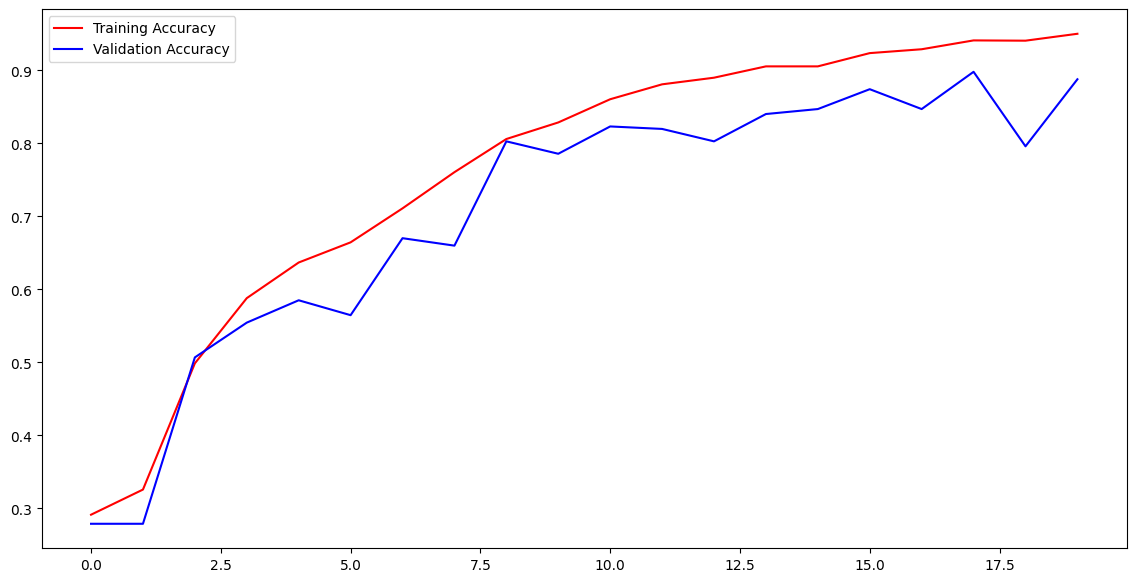

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'ro-', label="Training Accuracy")  # 'ro-' indicates red color, circle marker, and solid line
plt.plot(epochs, val_acc, 'bo-', label="Validation Accuracy")  # 'bo-' indicates blue color, circle marker, and solid line

# Add points for each epoch
for epoch, acc_value, val_acc_value in zip(epochs, acc, val_acc):
    plt.text(epoch, acc_value, f'({epoch+1}, {acc_value:.3f})', fontsize=8, color='red', ha='right', va='bottom')
    plt.text(epoch, val_acc_value, f'({epoch+1}, {val_acc_value:.3f})', fontsize=8, color='blue', ha='right', va='bottom')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [2]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'ro-', label="Training Loss")  
plt.plot(epochs, val_loss, 'bo-', label="Validation Loss")  

# Add points for each epoch
for epoch, loss_value, val_loss_value in zip(epochs, loss, val_loss):
    plt.text(epoch, loss_value, f'({epoch+1}, {loss_value:.3f})', fontsize=8, color='red', ha='right', va='bottom')
    plt.text(epoch, val_loss_value, f'({epoch+1}, {val_loss_value:.3f})', fontsize=8, color='blue', ha='right', va='bottom')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

prediction.

In [70]:
img = cv2.imread('./archive/Testing/pituitary_tumor/image(8).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [1]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

NameError: name 'img_array' is not defined

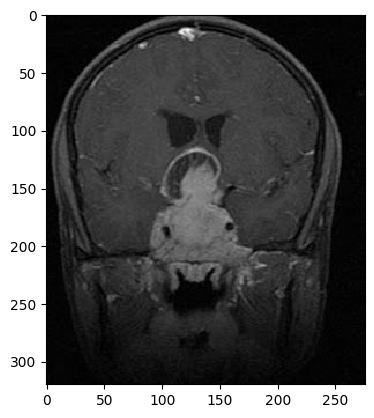

In [72]:
from tensorflow.keras.preprocessing import image
img = image.load_img('./archive/Testing/pituitary_tumor/image(8).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [73]:
b=CNN_model.predict(img_array)
indices = b.argmax()
indices

1/1 [==============================] - 0s 32ms/step


3